In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.special
import glob
#import bioinfokit 
from bioinfokit import analys, visuz

pd.options.mode.chained_assignment = None  # default='warn'

pd.set_option('display.max_columns',85)
pd.set_option('display.max_rows',100)

## my own function that gets the data
from Pi_GetData_fcn import GetData as GetData
from Pi_GetPiOverview_fcn import GetPiOverview as GetPiOverview


In [2]:
# define function
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'same')/w

## What you need:
* python functions:
  * **Pi_GetData_fcn.py**
  * **Pi_GetPiOverview_fcn.py**
  * data: 

Comment: This script also handles theta and D diversity measures the same way! In general we call the quantity **div**, as in diversity and it can be pi, theta or D

## What this script does:

- it loads diversity data with the **Pi_GetData_fcn.py** function 
  - in that function it:
      1. shifts the window position so that it applies to the whole genome and not chromosome position
      2. all samples are joined in one data frame
      3. there is df_shiftRaw with the raw data for fraction (%) of window covered and diversity (e.g. pi diversity) per window
      4. there is also df_shiftNorm in which for each window **div** is multiplied with frac
 - Then, calculate genome-wide **div** values either with the raw data or normalised data, with **Pi_GetPiOverview_fcn.py**
    1. **div**: uses the raw data, average ove all **div** values
    2. **div**Weight: using the df_shiftNorm data - it evaluates: 
$$\text{div}_{weight} = \frac{\sum_{i=1}^{n}\text{div}_{i}\cdot f_{i}}{\sum_{i=1}^{n}f_{i}}$$
      ( before, I had this, but I kicked it out: divNormwNaN: the final value is multiplied with the fraction of windows that are not nan)

![dataStructure](BioInfo.png)

In [3]:
# read in data to panda
InPath="/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/PiDiv_May24/defaultSet_500Cov/fractioncov_0.01/"
#InPath="/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/PiDiv_May24/defaultSet_500Cov/fractioncov_0.01/"
#InPath="/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/PiDiv_May24/defaultSet_500Cov/fractioncov_0.01/"
#InPath="/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/PiDiv_May24/defaultSet_500Cov/fractioncov_default/"
files=glob.glob(InPath+"*.pi")

outPath = "/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/PiDiv_May24/O_output/"

chromosomes=["NC_003279.8","NC_003280.10","NC_003281.10","NC_003282.8","NC_003283.11","NC_003284.9","NC_001328.1"]
chromosomes_end = [1.50750e+07, 3.03500e+07, 4.41350e+07, 6.16300e+07, 8.25550e+07, 1.00270e+08, 1.00285e+08]

len(files)

93

In [4]:
## use the function to get the data 
samName_collect, df_shiftRaw, df_shiftNorm, collect_sumofWeights, collect_NanNum = GetData(files, chromosomes, chromosomes_end,False)
overview = GetPiOverview(samName_collect, df_shiftRaw, df_shiftNorm, collect_sumofWeights, collect_NanNum)

overview["NumNaNWindows"] =  collect_NanNum

#overview
#df_shiftRaw
overview
df_shiftNorm

,chr,window_old,window,divNorm_VU_bn5_15_2,divNorm_VU_bb_15_3,divNorm_RUG_bb_15_5,divNorm_NIOO_bb_15_4,divNorm_WUR_bb_15_3,divNorm_RUG_bb_1_5,divNorm_RUG_bb_1_2,divNorm_UVA_anc_0_3,divNorm_VU_bb_15_5,divNorm_RUG_bb_15_3,divNorm_NIOO_bb_1_3,divNorm_VU_bn50_0_5,divNorm_VU_bb_1_2,divNorm_NIOO_A00_1_2,divNorm_Gent_bb_1_4,divNorm_VU_bn5_0_1,divNorm_RUG_bb_1_1,divNorm_VU_bn5_15_5,divNorm_Gent_iso_15_2,divNorm_NIOO_M00_1_1,divNorm_Gent_bb_15_3,divNorm_NIOO_M00_15_1,divNorm_VU_bn5_0_5,divNorm_NIOO_A00_1_5,divNorm_VU_bb_1_3,divNorm_VU_bn50_15_2,divNorm_NIOO_bb_1_1,divNorm_VU_bb_0_2,divNorm_Gent_bb_15_4,divNorm_VU_bn50_15_1,divNorm_VU_bn50_15_4,divNorm_Gent_iso_15_3,divNorm_VU_bb_0_3,divNorm_NIOO_M00_15_4,divNorm_VU_bn5_0_4,divNorm_VU_bb_1_4,divNorm_Gent_bb_1_1,divNorm_NIOO_bb_15_1,divNorm_NIOO_A00_15_5,...,divNorm_RUG_bb_1_4,divNorm_NIOO_bb_15_3,divNorm_NIOO_bb_1_4,divNorm_WUR_bb_15_1,divNorm_WUR_bb_1_3,divNorm_UVA_anc_0_2,divNorm_VU_bb_15_2,divNorm_VU_bn50_0_2,divNorm_VU_bn5_0_2,divNorm_Gent_bb_1_2,divNorm_VU_bn50_15_5,divNorm_VU_bb_0_1,divNorm_VU_bn5_15_3,divNorm_WUR_bb_1_1,divNorm_WUR_bb_1_2,divNorm_NIOO_M00_1_5,divNorm_Gent_bb_15_1,divNorm_NIOO_A00_15_1,divNorm_VU_bn50_15_3,divNorm_NIOO_A00_1_4,divNorm_Gent_bb_1_3,divNorm_VU_bn5_15_1,divNorm_VU_bn50_0_1,divNorm_WUR_bb_15_2,divNorm_VU_bb_15_4,divNorm_WUR_bleach_15_1,divNorm_NIOO_M00_15_5,divNorm_VU_bn50_0_3,divNorm_UVA_anc_0_1,divNorm_NIOO_A00_15_2,divNorm_VU_bb_0_5,divNorm_RUG_bb_15_1,divNorm_NIOO_M00_15_3,divNorm_NIOO_A00_15_4,divNorm_UVA_bb_0_1,divNorm_NIOO_A00_1_3,divNorm_RUG_bb_15_2,divNorm_Gent_iso_15_1,divNorm_Gent_bb_15_2,divNorm_NIOO_M00_1_3,divNorm_WUR_bleach_15_2,divNorm_VU_bb_0_4
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NC_003279.85000,NC_003279.8,5000,5000.0,0.002327,0.002354,0.002462,0.002507,0.001994,0.001953,0.002153,0.002529,0.002174,0.002175,0.002068,0.002333,0.002010,0.001833,0.002299,0.002594,0.002093,0.002658,0.002294,0.001443,0.002548,0.001835,0.002751,0.001586,0.002306,0.002457,0.002594,0.002432,0.002320,0.002220,0.002423,0.002877,0.002599,0.001582,0.002822,0.002302,0.001947,0.002138,0.001992,...,0.001980,0.002165,0.002580,0.002227,0.002373,0.002474,0.002177,0.002214,0.001832,0.002177,0.002465,0.002091,0.002719,0.002086,0.001978,0.001869,0.002354,0.001830,0.002650,0.002028,0.002366,0.002181,0.002301,0.002802,0.002423,0.002359,0.001628,0.002896,0.002395,0.001804,0.002198,0.002367,0.001574,0.001951,0.002475,0.001835,0.002175,0.002409,0.002560,0.001841,0.002436,0.002486
NC_003279.815000,NC_003279.8,15000,15000.0,0.000473,0.000609,0.000774,0.000741,0.000470,0.000655,0.000665,0.000592,0.000810,0.000655,0.000613,0.000574,0.000640,0.000356,0.000683,0.000583,0.000588,0.000547,0.000609,0.000449,0.000590,0.000436,0.000479,0.000392,0.000671,0.000728,0.000617,0.000566,0.000562,0.000561,0.000714,0.000737,0.000672,0.000036,0.000526,0.000784,0.000684,0.000561,0.000271,...,0.000636,0.000597,0.000353,0.000505,0.000725,0.000758,0.000619,0.000486,0.000276,0.000603,0.000505,0.000556,0.000716,0.000684,0.000586,0.000145,0.000740,0.000529,0.000871,0.000199,0.000570,0.000532,0.000579,0.000647,0.000514,0.000536,0.000114,0.000551,0.000729,0.000337,0.000707,0.000622,0.000149,0.000424,0.000586,0.000334,0.000598,0.000634,0.000700,0.000089,0.000544,0.000618
NC_003279.825000,NC_003279.8,25000,25000.0,0.000328,0.000494,0.000577,0.000644,0.000463,0.000460,0.000481,0.000597,0.000561,0.000573,0.000446,0.000452,0.000485,0.000435,0.000519,0.000568,0.000472,0.000417,0.000523,0.000568,0.000560,0.000051,0.000408,0.000241,0.000486,0.000477,0.000550,0.000521,0.000549,0.000470,0.000474,0.000555,0.000541,0.000000,0.000454,0.000438,0.000598,0.000400,0.000461,...,0.000524,0.000446,0.000192,0.000430,0.000521,0.000538,0.000463,0.000517,0.000276,0.000488,0.000487,0.000556,0.000497,0.000502,0.000483,0.000332,0.000607,0.000652,0.000616,0.000407,0.000492,0.000475,0.000543,0.000546,0.000444,0.000442,0.000070,0.000485,0.000487,0.000289,0.000607,0.000490,0.000026,0.00

In [10]:

#the fields that we are interested in: 
samName_collect_frac = ["frac_"+s for s in samName_collect]
threshold = 0.6

df_shiftRaw_threshold = df_shiftRaw.copy()

print(df_shiftRaw_threshold.isna().sum().sum())


for i in range(len(samName_collect)):
    column = df_shiftRaw_threshold[samName_collect_frac[i]].values

    #print(np.sum(np.isnan(column)))
    column_new = np.where(column<= threshold, np.nan, column)
    #print(np.sum(np.isnan(column_new)))
    df_shiftRaw_threshold[samName_collect_frac[i]] = column_new


print(df_shiftRaw_threshold.isna().sum().sum())
df_shiftRaw_threshold

206
6580


,chr,window_old,window,frac_VU_bn5_15_2,div_VU_bn5_15_2,frac_VU_bb_15_3,div_VU_bb_15_3,frac_RUG_bb_15_5,div_RUG_bb_15_5,frac_NIOO_bb_15_4,div_NIOO_bb_15_4,frac_WUR_bb_15_3,div_WUR_bb_15_3,frac_RUG_bb_1_5,div_RUG_bb_1_5,frac_RUG_bb_1_2,div_RUG_bb_1_2,frac_UVA_anc_0_3,div_UVA_anc_0_3,frac_VU_bb_15_5,div_VU_bb_15_5,frac_RUG_bb_15_3,div_RUG_bb_15_3,frac_NIOO_bb_1_3,div_NIOO_bb_1_3,frac_VU_bn50_0_5,div_VU_bn50_0_5,frac_VU_bb_1_2,div_VU_bb_1_2,frac_NIOO_A00_1_2,div_NIOO_A00_1_2,frac_Gent_bb_1_4,div_Gent_bb_1_4,frac_VU_bn5_0_1,div_VU_bn5_0_1,frac_RUG_bb_1_1,div_RUG_bb_1_1,frac_VU_bn5_15_5,div_VU_bn5_15_5,frac_Gent_iso_15_2,div_Gent_iso_15_2,frac_NIOO_M00_1_1,...,frac_VU_bn5_15_1,div_VU_bn5_15_1,frac_VU_bn50_0_1,div_VU_bn50_0_1,frac_WUR_bb_15_2,div_WUR_bb_15_2,frac_VU_bb_15_4,div_VU_bb_15_4,frac_WUR_bleach_15_1,div_WUR_bleach_15_1,frac_NIOO_M00_15_5,div_NIOO_M00_15_5,frac_VU_bn50_0_3,div_VU_bn50_0_3,frac_UVA_anc_0_1,div_UVA_anc_0_1,frac_NIOO_A00_15_2,div_NIOO_A00_15_2,frac_VU_bb_0_5,div_VU_bb_0_5,frac_RUG_bb_15_1,div_RUG_bb_15_1,frac_NIOO_M00_15_3,div_NIOO_M00_15_3,frac_NIOO_A00_15_4,div_NIOO_A00_15_4,frac_UVA_bb_0_1,div_UVA_bb_0_1,frac_NIOO_A00_1_3,div_NIOO_A00_1_3,frac_RUG_bb_15_2,div_RUG_bb_15_2,frac_Gent_iso_15_1,div_Gent_iso_15_1,frac_Gent_bb_15_2,div_Gent_bb_15_2,frac_NIOO_M00_1_3,div_NIOO_M00_1_3,frac_WUR_bleach_15_2,div_WUR_bleach_15_2,frac_VU_bb_0_4,div_VU_bb_0_4
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NC_003279.85000,NC_003279.8,5000,5000.0,0.967,0.002407,1.000,0.002354,0.979,0.002515,0.989,0.002535,0.983,0.002028,0.963,0.002028,0.989,0.002177,1.000,0.002529,0.976,0.002228,0.980,0.002220,0.987,0.002095,0.976,0.002390,0.973,0.002065,0.976,0.001878,0.977,0.002353,0.999,0.002597,0.970,0.002157,0.982,0.002707,0.992,0.002313,0.932,...,0.978,0.002230,0.999,0.002303,0.984,0.002848,0.977,0.002480,0.958,0.002463,0.938,0.001735,0.979,0.002958,0.982,0.002439,0.963,0.001874,0.997,0.002204,0.987,0.002398,0.938,0.001678,0.975,0.002001,0.984,0.002515,0.981,0.001871,0.973,0.002235,0.964,0.002499,0.967,0.002648,0.759,0.002425,0.995,0.002448,0.987,0.002518
NC_003279.815000,NC_003279.8,15000,15000.0,0.999,0.000474,0.998,0.000610,0.998,0.000776,0.998,0.000742,0.999,0.000470,0.999,0.000656,1.000,0.000665,0.999,0.000593,0.998,0.000812,0.999,0.000656,0.998,0.000615,0.996,0.000576,1.000,0.000640,0.991,0.000359,1.000,0.000683,0.999,0.000584,0.999,0.000588,0.995,0.000550,0.998,0.000611,0.925,...,0.995,0.000535,1.000,0.000579,0.999,0.000648,0.996,0.000516,0.997,0.000537,0.998,0.000114,0.997,0.000553,1.000,0.000729,1.000,0.000337,0.997,0.000709,0.997,0.000624,0.996,0.000150,0.999,0.000424,0.999,0.000586,0.995,0.000335,0.998,0.000599,0.999,0.000634,1.000,0.000700,NaN,0.000155,0.998,0.000545,0.998,0.000620
NC_003279.825000,NC_003279.8,25000,25000.0,0.995,0.000329,0.997,0.000496,0.995,0.000580,0.999,0.000644,0.994,0.000465,0.996,0.000461,0.995,0.000483,0.995,0.000600,0.994,0.000565,1.000,0.000573,0.994,0.000449,0.994,0.000455,0.995,0.000488,0.993,0.000438,1.000,0.000519,0.995,0.000571,0.995,0.000474,0.993,0.000420,0.997,0.000525,0.980,...,0.993,0.000478,0.995,0.000546,0.994,0.000549,0.994,0.000447,0.994,0.000444,0.994,0.000071,0.994,0.000488,0.995,0.000489,0.994,0.000291,0.998,0.000608,0.997,0.000492,0.994,0.000026,0.995,0.000369,0.995,0.000552,0.994,0.000279,0.999,0.000627,0.995,0.000503,0.994,0.000524,0.603,0.000237,0.996,0.000500,0.999,0.000669
NC_003279.835000,NC_003279.8,35000,35000.0,0.996,0.000402,0.997,0.000544,0.997,0.000592,0.997,0.000692,0.996,0.000552,0.997,0.000627,0.999,0.000517,0.998,0.000471,0.994,0.000602,0.997,0.000538,0.997,0.000448,0.995,0.000475,0.998,0.000459,0.996,0.000296,0.998,0.000484,0.997,0.000556,0.998,0.000550,0.990,0.000599,0.997,0.000596,0.945,...,0.994,0.000622,0.996,0.000474,0.997,0.000714,0.995,0.000604,0.996,0.000474,0.994,0.000294,0.995,0.000455,0.997,0.000608,0.997,0.000250,0.997,0.000689,0.998,0.000634,0.993,0.000295,0.998,0.000371,0.997,0.000453,0.994,0.000302,0.997,0.

<Axes: xlabel='NumNaNWindows', ylabel='div_mean'>

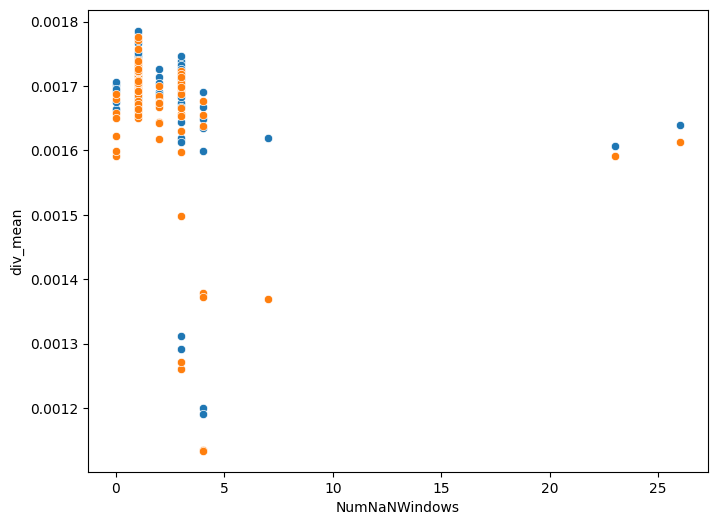

In [11]:
# what is the impact of the number of windows that we have to ignore?

fig2, ax2 = plt.subplots(figsize=(8,6))
sns.scatterplot(overview, x="NumNaNWindows",y="div_mean", ax=ax2)
sns.scatterplot(overview, x="NumNaNWindows",y="divWeight_mean", ax=ax2)



array([[ 1.        , -0.08166447],
       [-0.08166447,  1.        ]])

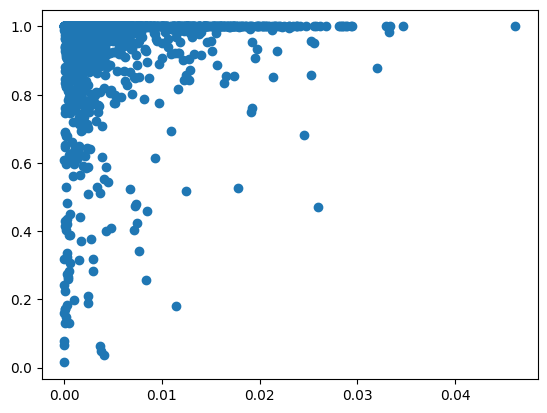

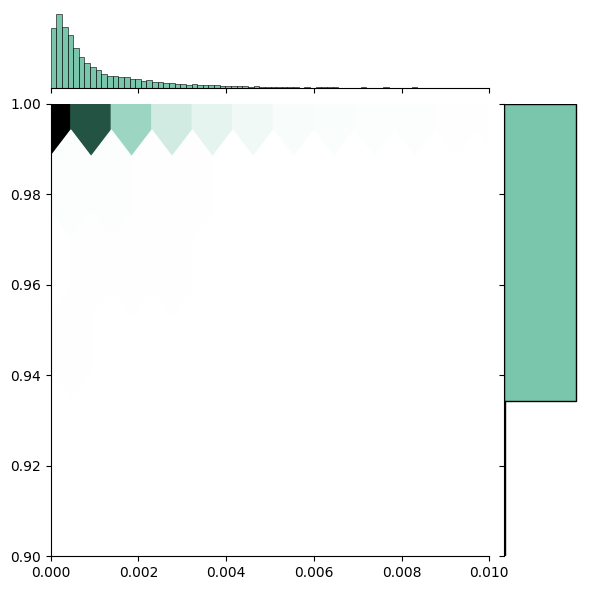

In [5]:
(np.array(overview["div_mean"].values) - np.array(overview["divWeight_mean"].values)) < 0

plt.scatter(df_shiftRaw["div_Gent_bb_1_1"].values,df_shiftRaw["frac_Gent_bb_1_1"].values)
#plt.xlim([0, 0.01])
#plt.ylim([0.9, 1])
mask = ~np.isnan(df_shiftRaw["div_Gent_bb_1_1"].values)
x = df_shiftRaw["div_Gent_bb_1_1"].values[mask]
y = df_shiftRaw["frac_Gent_bb_1_1"].values[mask]
sns.jointplot(x=x, y=y, kind="hex", color="#4CB391", xlim=[0,0.01], ylim=[0.9, 1])#, xscale="log")
np.corrcoef(x, y)

In [21]:
n = len(df_shiftRaw["frac_Gent_bb_1_1"].values)
C_f = np.linalg.norm(df_shiftRaw["frac_Gent_bb_1_1"].values, ord=1) / np.linalg.norm(df_shiftRaw["frac_Gent_bb_1_1"].values, ord=2)
print(C_f)
no_nans = df_shiftRaw["div_Gent_bb_1_1"].values[~np.isnan(df_shiftRaw["div_Gent_bb_1_1"].values)]
C_p = np.linalg.norm(no_nans, ord=1) / np.linalg.norm(no_nans, ord=2)
print(C_p)
print(C_f * C_p / n)
print(np.arccos(C_f * C_p / n))

99.84599358852101
47.116894498213426
0.4689426979644775
1.0827030173787957


10032

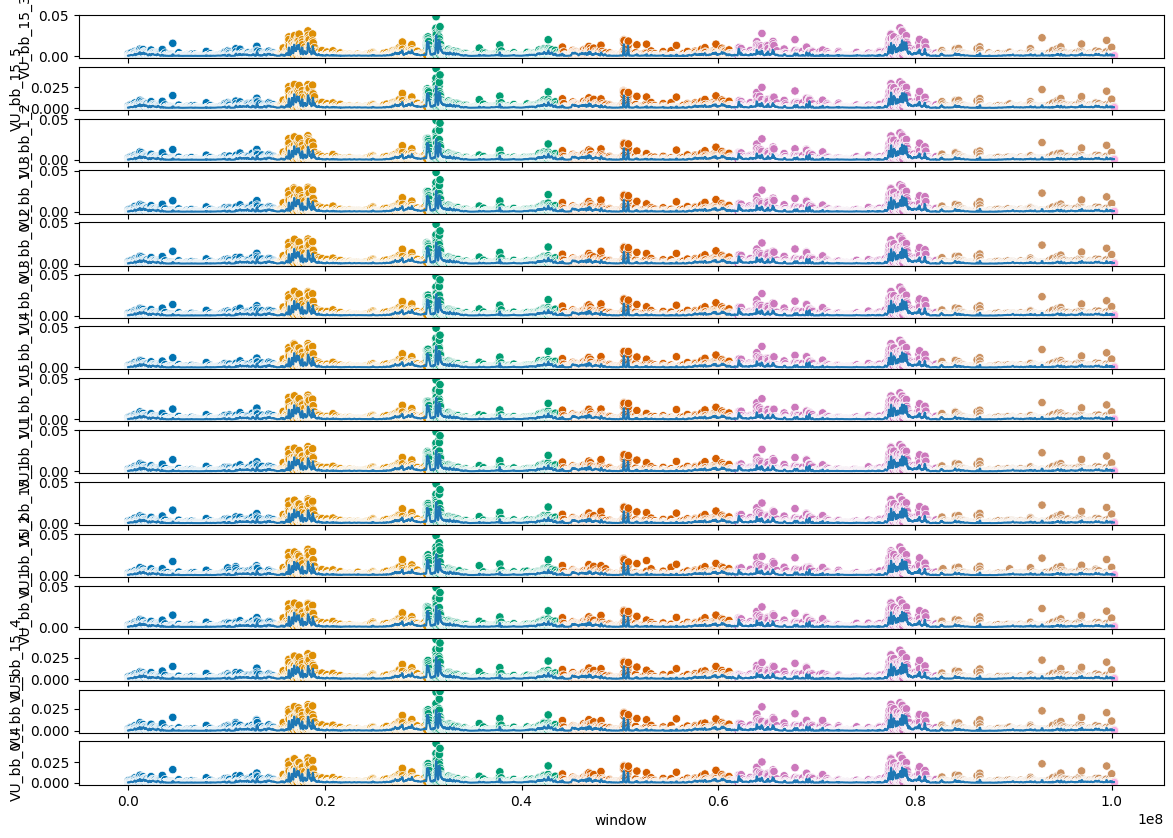

In [7]:
## this is just here for check reasons:
### -- to see if we have data for the whole genome

samName_plot = [s for s in samName_collect if "VU_bb" in s]

f1, axx = plt.subplots(len(samName_plot),1, sharex='col', figsize=(14, 10))#, sharex=True)
windowSize=10

for i in range(len(samName_plot)):
    plot = sns.scatterplot(ax=axx[i], data=df_shiftNorm, x='window', y="divNorm"+"_"+samName_plot[i], 
                   hue='chr', palette = 'colorblind', legend=None) 
    axx[i].set_ylabel(samName_plot[i])
    movmean = moving_average(df_shiftNorm["divNorm"+"_"+samName_plot[i]], windowSize)
    axx[i].plot(np.array(df_shiftNorm['window'].values),movmean)



In [62]:
# only look at backbone
overviewBB = overview.loc[(overview['treatment']=="bb") | (overview['treatment']=="anc")]
overviewnotBB = overview.loc[(overview['treatment']!="bb") | (overview['treatment']=="anc")]
overviewW0 = overview.loc[(overview['week']==0)]
overviewW1 = overview.loc[(overview['week']==1)]
overviewW15 = overview.loc[(overview['week']==15)]

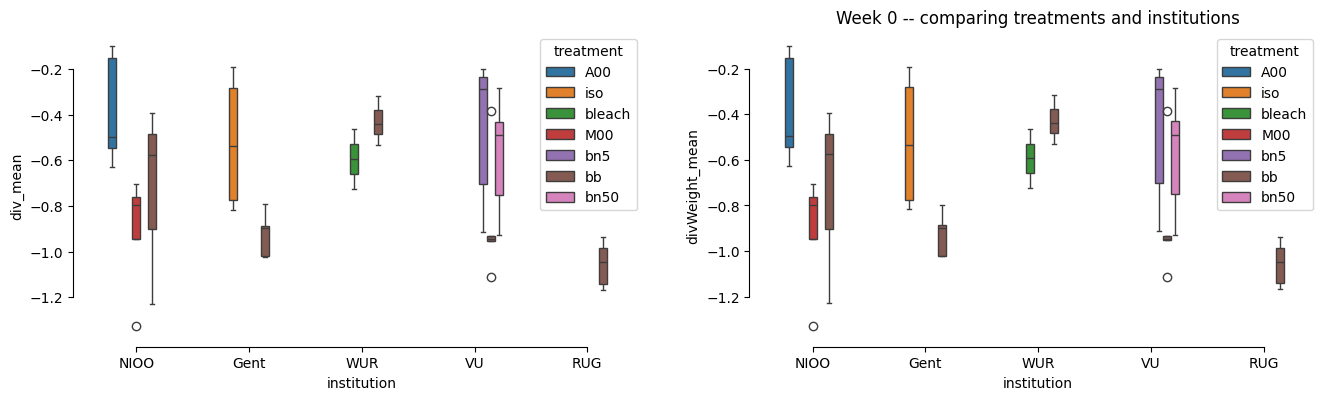

In [63]:
## hypothesis: different treatments start out with different diversity from the start:

fig1, ax1 = plt.subplots(1,2, figsize=(16,4))
plt.title('Week 0 -- comparing treatments and institutions')
sns.boxplot(data=overviewW15, x="institution", y="div_mean", hue="treatment", width=0.5, ax=ax1[0])
#sns.move_legend(ax1[0], "upper left", bbox_to_anchor=(1, 1))
sns.boxplot(data=overviewW15, x="institution", y="divWeight_mean", hue="treatment", width=0.5, ax=ax1[1])

#sns.move_legend(ax1[1], "upper left", bbox_to_anchor=(1, 1))

sns.despine(offset=5, trim=True)


In [64]:
### save the data:
df_shiftRaw.to_pickle(outPath + "PiDiv_df_shiftRaw_singleData_20240724.pkl")
df_shiftRaw.to_csv(outPath + "PiDiv_df_shiftRaw_singleData_20240724.csv", index=False)

df_shiftNorm.to_pickle(outPath + "PiDiv_df_shiftNorm_singleData_20240724.pkl")
df_shiftNorm.to_csv(outPath + "PiDiv_df_shiftNorm_singleData_20240724.csv", index=False)

overview.to_pickle(outPath + "PiDiv_df_overview_singleData_20240724.pkl")
overview.to_csv(outPath + "PiDiv_df_overview_singleData_20240724.csv", index=False)


In [34]:
outPath

'/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/PiDiv_May24/O_output/'

In [28]:
df = pd.DataFrame({"a": [1,2,3,np.nan]})
df

,a
0,1.0
1,2.0
2,3.0
3,NaN


In [29]:
df.mean()

a    2.0
dtype: float64